# First analysis:

### This notebook will be dedicated to unveil the surfeace insight of the real estate data 

In [219]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sb

In [220]:
df = pd.read_csv("../data/real_estate_28-06-2022_v2.csv")

['departamentos' 'casas' 'sitios' 'parcelas' 'oficinas' 'locales'
 'terrenos' 'industriales' 'agrícolas' 'bodegas' 'otros inmuebles'
 'estacionamientos' 'loteos' 'lotes de cementerio']


<AxesSubplot:>

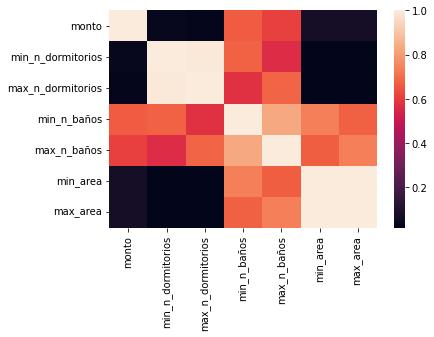

In [221]:
print(df["propiedad"].unique())
df = df.loc[df["oferta"]=="venta",:]
corr = df.loc[df["propiedad"]=="casas",:].corr()
sb.heatmap(corr)

In [222]:
ha_mask = df["unidad_medida"] == "ha"
df.loc[ha_mask, "area_m2"] = df.loc[ha_mask, "min_area"] * 10000
df.loc[[not ha for ha in ha_mask], "area_m2"] = df.loc[[not ha for ha in ha_mask], "min_area"] 
df.loc[ha_mask,"area_m2"]

4038         30000.0
4041         30000.0
4055        510000.0
4059      11450000.0
4076     105450000.0
            ...     
19906      5000000.0
19910     50000000.0
19911     50000000.0
19912     50000000.0
19913        20000.0
Name: area_m2, Length: 881, dtype: float64

In [223]:
# Gives the mean of each numerical value in this case I'm interested in price per squared meter. 
# The Dataframe is grouped by comuna and only "casas" are selected as the propertie feature.

df.loc[df["moneda"]=="$", "UF"] = df.loc[df["moneda"]=="$", "monto"] * 1/33165 # 33.165 CLP x UF | 06-07-2022
df.loc[df["moneda"]=="u$s", "UF"] = df.loc[df["moneda"]=="u$s", "monto"] * 976.65 / 33165 # 976.65 CLP x USD | 06-07-2022
df.loc[df["moneda"]=="uf", "UF"] = df.loc[df["moneda"]=="uf", "monto"]
df["UF_m2"] = df["UF"] / df["area_m2"] # UF per squared meter

Merging with communes dataset to compare by region.

In [224]:
comm_df = pd.read_csv("../data/communes_of_chile.csv")
meangroup_comm = df.loc[df["propiedad"]=="terrenos",:].groupby(by=["comuna"], as_index=False).mean()

In [225]:
# Here I'm interested in the specifical reagion of each commune, so I can plot the together as a hue value.
mean_withregion = meangroup_comm.merge(right=comm_df.drop(columns=["provincia", "cut"]))
mean_withregion = mean_withregion.loc[mean_withregion["región"] != "tarapacá",:]

<AxesSubplot:xlabel='región', ylabel='UF_m2'>

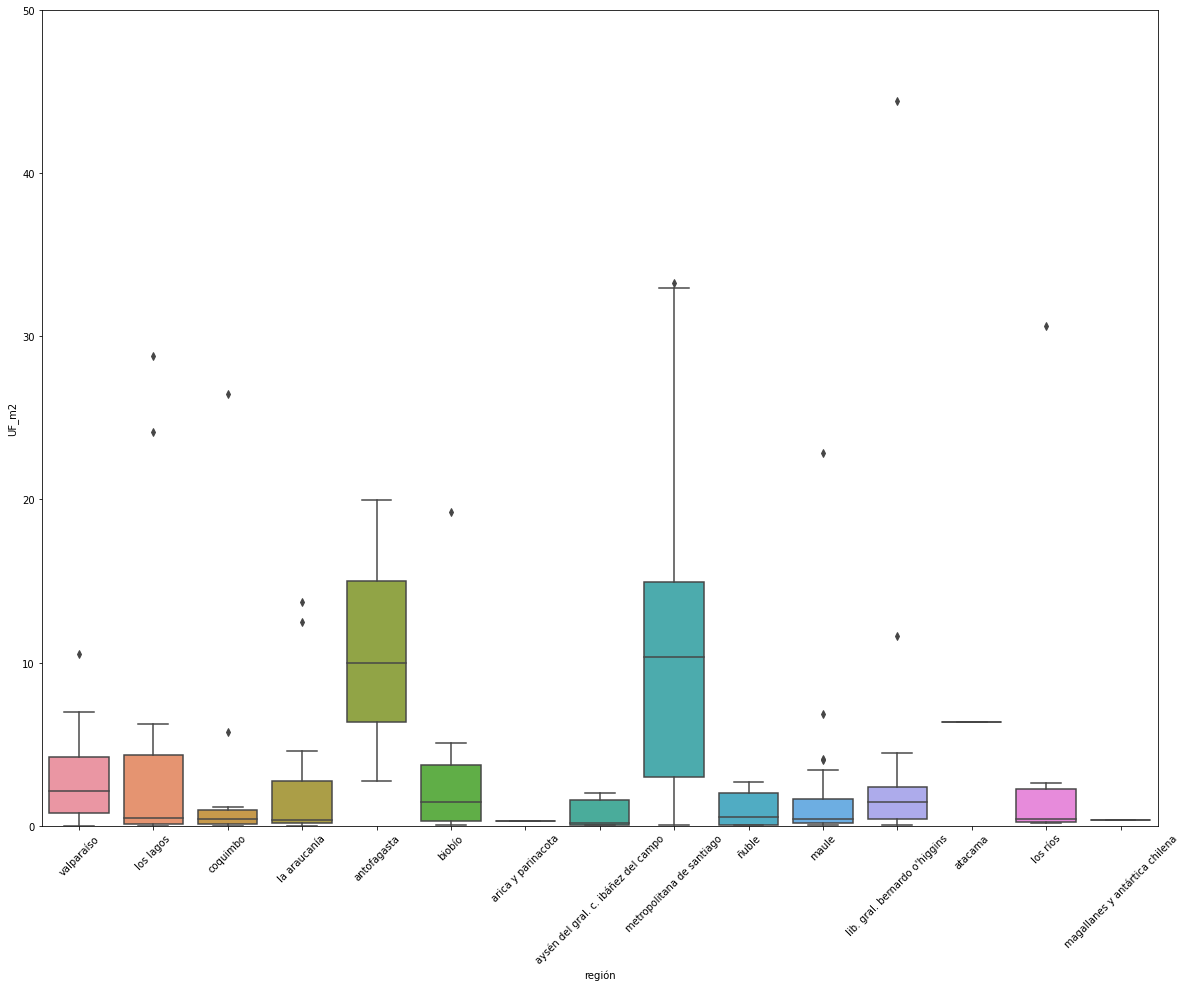

In [226]:
fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,50])
sb.boxplot(data=mean_withregion, x="región", y="UF_m2", ax=ax)

Now, I'll be focusing in a particular region. In this next code box, we'll be studying 'Los Lagos' region.

<AxesSubplot:xlabel='comuna', ylabel='UF_m2'>

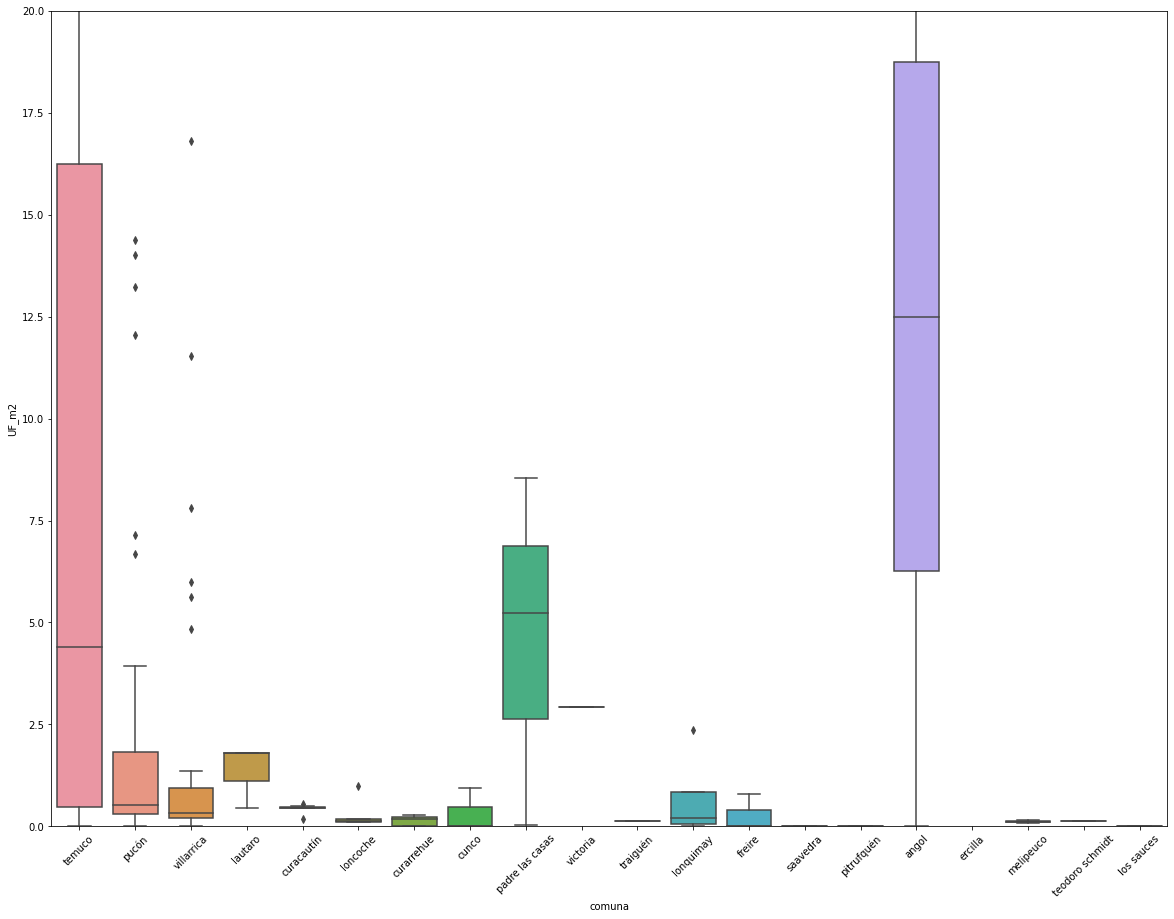

In [227]:
# Only 'ventas' or sells, merge with communes dataset to identify regions. In the third row next, propperties of interest are displayed.
comm_merge = df.merge(comm_df)
sells_mask = np.all([comm_merge["región"]=="la araucanía", \
    np.any([comm_merge["propiedad"]=="terrenos",comm_merge["propiedad"]=="terrenos"], axis=0)], \
        axis=0)

fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,20])

region = comm_merge.loc[sells_mask, :]
sb.boxplot(data=region, x="comuna", y="UF_m2", ax=ax)

In [228]:
best_region = region.loc[region["comuna"]=="villarrica",["direccion","area_m2","comentario","UF","UF_m2","monto","moneda"]].sort_values(by="UF_m2")
#len(df.index)
#region.loc[region.index == 10569 ,:] # outliear. Very strange price, and it's on portalinmobiliario.com
best_region.loc[best_region["area_m2"]<=100000,:].head(15)


,direccion,area_m2,comentario,UF,UF_m2,monto,moneda
11102,"costanera pucará, chile, centro de villarrica,...",13050.0,"mejor ubicación en villarrica, para megaproyecto",15.000000,0.001149,15,uf
11106,"gv93+xg villarrica, chile, lican ray, villarrica",5000.0,"lican ray, challupen alto",783.958993,0.156792,26000000,$
11083,"gvc3+5v villarrica, chile, lican ray, villarrica",5000.0,lican ray; challupén alto,934.720338,0.186944,31000000,$
11091,parcelas rol propio y servicios - vista volcán...,5000.0,"parcelas rol propio y servicios - orilla rio, ...",949.000000,0.189800,949,uf
11080,"alto rayen / villarrica, villarrica",5000.0,terreno en venta en villarrica / alto rayen / ...,1022.000000,0.204400,1022,uf
11072,"jpqr+4g villarrica, chile, villarrica",5209.0,hermoso terreno en villarrica,1206.090758,0.231540,40000000,$
11071,"parcela el arrayan,toda la naturaleza de la ri...",6000.0,terreno construccion en venta en villarrica,1417.156641,0.236193,47000000,$
11105,"villarrica, chile, centro de villarrica, villa...",5000.0,y b p r o p i e d a d e s . c l parcelas en co...,1206.090758,0.241218,40000000,$
11067,"s-553, el pastal, villarrica, chile, villarrica",5300.0,"parcela en condominio el arrayán, con laguna y...",1296.547565,0.244632,43000000,$
11098,"pedregoso, chile, centro de villarrica, villar...",10000.0,1ha a pasos de villarrica,2562.942861,0.256294,85000000,$


<AxesSubplot:xlabel='comuna', ylabel='UF_m2'>

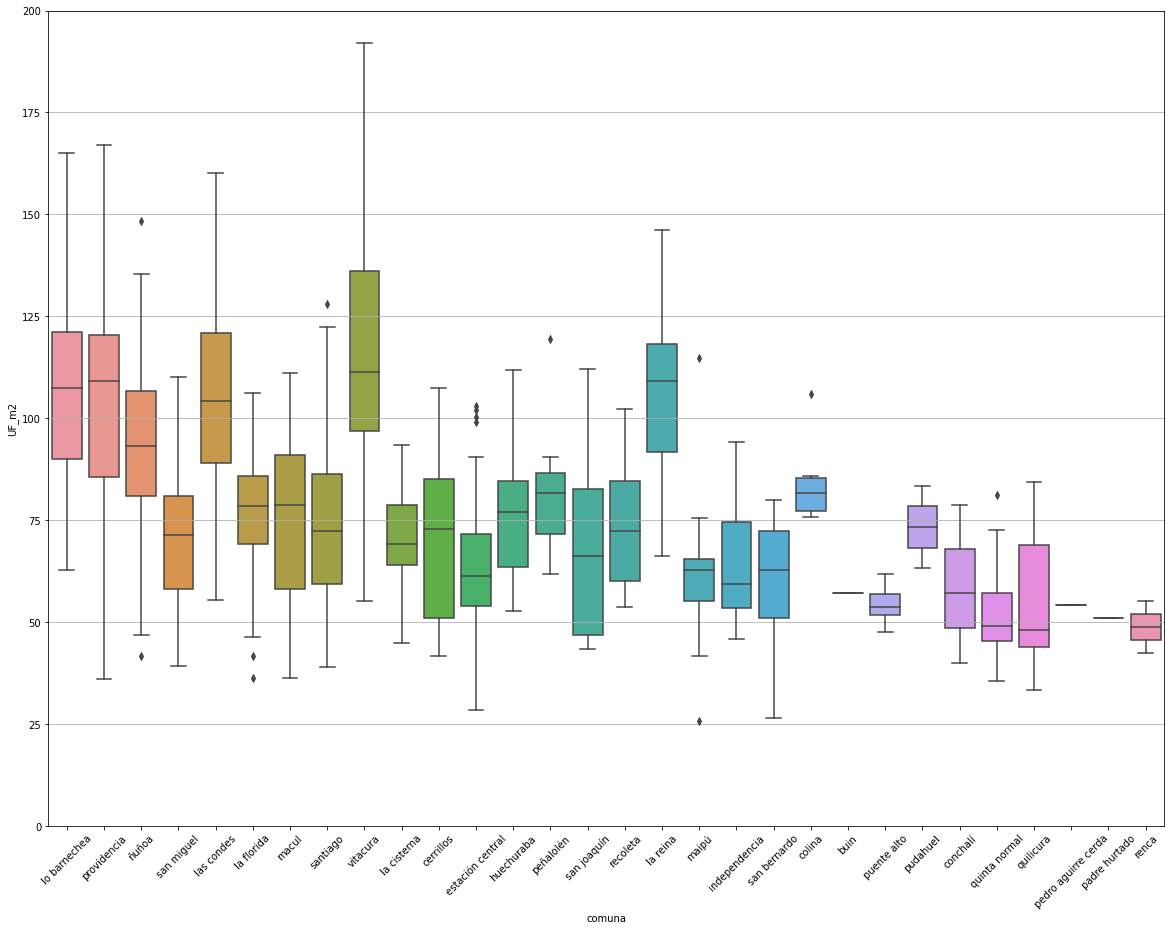

In [234]:
comm_merge = df.merge(comm_df)
sells_mask = np.all([comm_merge["región"]=="metropolitana de santiago", \
    np.any([comm_merge["propiedad"]=="departamentos",comm_merge["propiedad"]=="departamentos"], axis=0)], \
        axis=0)

fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,200])
ax.grid()

region = comm_merge.loc[sells_mask, :]
sb.boxplot(data=region, x="comuna", y="UF_m2", ax=ax)